# 은닉층

은닉층의 크기를 정의: ``hidden_layer_sizes``
- 은닉층의 수와 뉴런의 개수를 **튜플**로 전달함
- ex) 10개의 뉴런을 가진 2개의 은닉층을 만든다 hidden_layer_sizes=(10,10)
- hidden_layer_sizes의 기본값은 (100, )
- 하나의 은닉층에 10개의 뉴런이 있다 (10,)


# 활성화 함수 (activation)

- 'activation': sigmoid -> logistic
- 렐루라는 함수가 기본값

# alpha - 규제 적용

- 일반적으로 L1 규제 효과가 크지 않기 때문에,  
**L2**규제만 지원함 (sklearn 한정)
- alpha: 0.0001 기본값

#  다양한 하이퍼파라미터

batch_size: 배치크기  
learning_rate_init: 학습률 초기값  
learning_rate: 학습률 크기  
max_iter: 500  <- epoc 같은거

# 코드 실습

In [3]:
# 라이브러리 불러오기

import mglearn
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

인공신경망에 two_moons 데이터셋을 적용  
은닉 유닛의 개수는 따로 설정 x, 기본값인 100을 사용한다

In [4]:
x, y = make_moons(n_samples=100, noise=0.25, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                   random_state=1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'property 1')

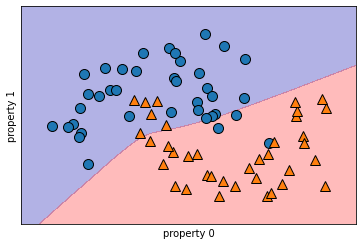

In [15]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'property 1')

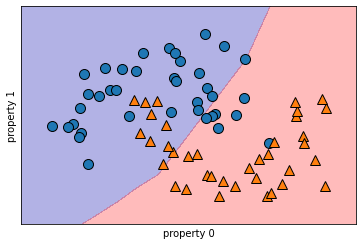

In [16]:
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

- 은닉 유닛 추가  
- 은닉층 추가  
- 활성화 함수 사용

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'property 1')

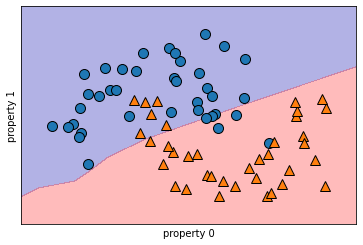

In [17]:
# 10개의 유닛으로 구성된 두 개의 은닉층

mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'property 1')

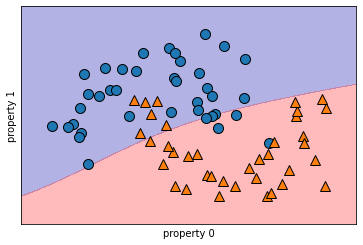

In [18]:
# 활성화 함수 적용
mlp = MLPClassifier(random_state=0, hidden_layer_sizes=[10, 10],
                   activation='tanh')
mlp.fit(x_train, y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel("property 0")
plt.ylabel("property 1")

# 유방암 데이터 실습

In [34]:
# 라이브러리 불러오기

import mglearn
import graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [35]:
cancer = load_breast_cancer()

In [36]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

In [38]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

426
426
143
143


In [39]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [40]:
print('훈련 세트 정확도: ', mlp.score(x_train, y_train))
print('테스트 세트 정확도: ', mlp.score(x_test, y_test))

훈련 세트 정확도:  0.9272300469483568
테스트 세트 정확도:  0.9300699300699301


MLP 정확도가 꽤 높구나!  

근데 정확도를 좀 더 높일 수 있는 방법이 있지 않을까???  
평균 0, 분산 1 가지도록 데이터를 변형해주면  
성능이 좋아질 수도 있다~
- ``standardscaler``: 데이터가 평균이 0, 분산이 1이 되도록 스케일링을 진행

In [41]:
from sklearn.preprocessing import StandardScaler

# 스케일러 정의
# 스케일러 학습
# 데이터 변환

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) # fit을 안 해주는 이유는? 궁금해 궁금해~


In [44]:
mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

```python
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
```
이 문구가 뜬다면?  
``max_iter`` 값을 늘려주는 게 좋다~~


In [45]:
# score: accuracy
print("훈련 세트 정확도: ", mlp.score(x_train_scaled, y_train))
print("테스트 세트 정확도: ", mlp.score(x_test_scaled, y_test))


훈련 세트 정확도:  0.9906103286384976
테스트 세트 정확도:  0.965034965034965


In [46]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [47]:
print("훈련 세트 정확도: ", mlp.score(x_train_scaled, y_train))
print("테스트 세트 정확도: ", mlp.score(x_test_scaled, y_test))

훈련 세트 정확도:  1.0
테스트 세트 정확도:  0.972027972027972


훈련 세트 정확도가 1.0이네?  
과대 적합을 의심해봐야겠다...
알파 값을 줘볼까?


In [48]:
mlp = MLPClassifier(max_iter=1000, random_state=0, alpha=1)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=0)

In [49]:
print("훈련 세트 정확도: ", mlp.score(x_train_scaled, y_train))
print("테스트 세트 정확도: ", mlp.score(x_test_scaled, y_test))

훈련 세트 정확도:  0.9882629107981221
테스트 세트 정확도:  0.972027972027972


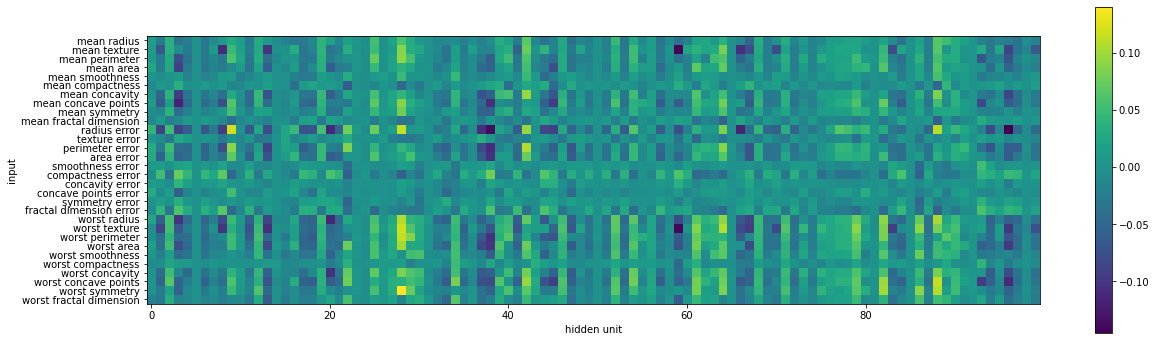

In [56]:
plt.figure(figsize=(20, 6))
plt.imshow(mlp.coefs_[0], interpolation="none", cmap="viridis") #coefs: 가중치
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input")
plt.colorbar()

In [57]:
hidden_layer_sizes = (100, )